In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-dataset/Walmart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
walmart=pd.read_csv('/kaggle/input/walmart-dataset/Walmart.csv')

In [4]:
df=walmart.copy()


                                                    Data Preprocessing
                                                    

In [5]:
walmart.sample(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4070,29,13-05-2011,549551.02,0,57.71,4.095,134.593000,9.966
154,2,23-04-2010,1821990.93,0,65.11,2.795,210.100065,8.200
4932,35,10-06-2011,855130.21,0,73.26,3.881,138.860638,8.512
981,7,15-06-2012,666942.02,0,59.33,3.723,197.692292,8.090
1744,13,20-08-2010,1997397.63,0,76.34,2.850,126.076645,7.951
495,4,13-05-2011,2002362.37,0,70.65,3.872,129.089000,5.946
5459,39,30-07-2010,1308222.24,0,80.99,2.640,210.128679,8.360
3925,28,29-04-2011,1222367.90,0,68.27,4.151,128.999867,13.736
4292,31,19-02-2010,1473386.75,0,39.75,2.514,210.945160,8.324
5095,36,28-10-2011,306193.81,0,71.31,3.306,216.405132,7.716


In [6]:
walmart.shape

(6435, 8)

In [7]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Good news! for us there is no missing value we save lot's of time for preprocessing

In [9]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


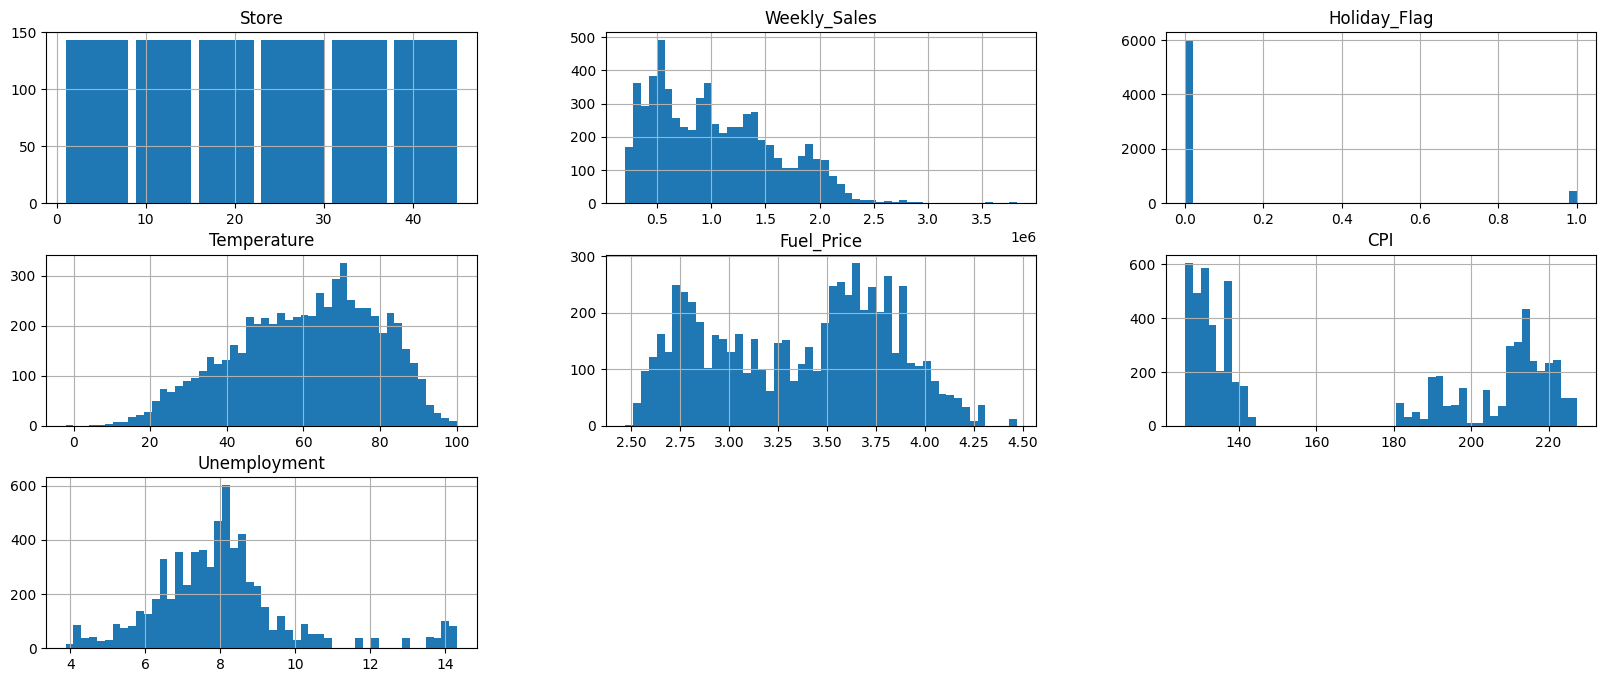

In [10]:
walmart.hist(bins=50,figsize=(20,8))
plt.show()

Above visualization tell us that Temperature,Umemployment,Fuel_price are almost normal distributed,Holiday_Flag contains more values of 0 then 1 which mean for few weeks store is off most of time store is open which is great and CPI features has some breaks we will try to figure out why it happen and weekly_sales is right skewed distributed

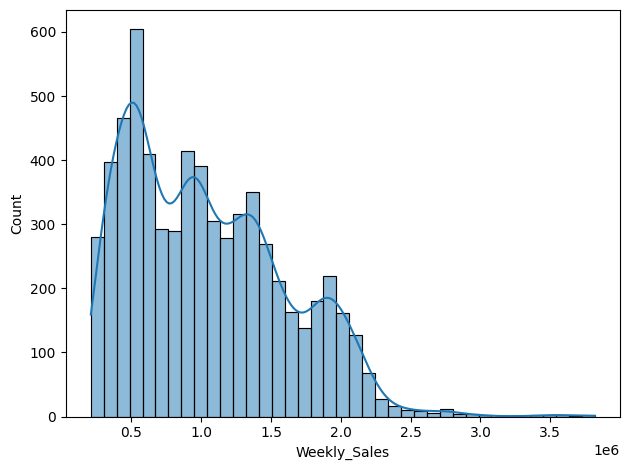

In [11]:
sns.histplot(walmart['Weekly_Sales'],kde=True)
plt.tight_layout()
plt.show()

In [12]:
from datetime import datetime
walmart['Date']=pd.to_datetime(walmart['Date'],format='%d-%m-%Y')

In [13]:
# extract year,month,day from date feature for futher analysis
walmart['Year']=walmart['Date'].dt.year
walmart['Month']=walmart['Date'].dt.month
walmart['Day']=walmart['Date'].dt.day
walmart['Year-Month']=walmart['Year'].astype(str) + '-' +walmart['Month'].astype(str)

In [14]:
walmart.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Year-Month
88,1,2011-10-14,1493525.93,0,71.74,3.274,217.355273,7.866,2011,10,14,2011-10
4849,34,2012-08-03,973250.41,0,78.93,3.374,130.737871,9.285,2012,8,3,2012-8
2636,19,2011-04-15,1392093.04,0,48.67,3.981,134.278467,7.658,2011,4,15,2011-4
5257,37,2012-03-09,535937.25,0,63.19,3.669,219.743731,7.244,2012,3,9,2012-3
2479,18,2011-01-07,933960.30,0,30.10,3.193,132.882323,9.131,2011,1,7,2011-1



                                                        EDA
                                                        

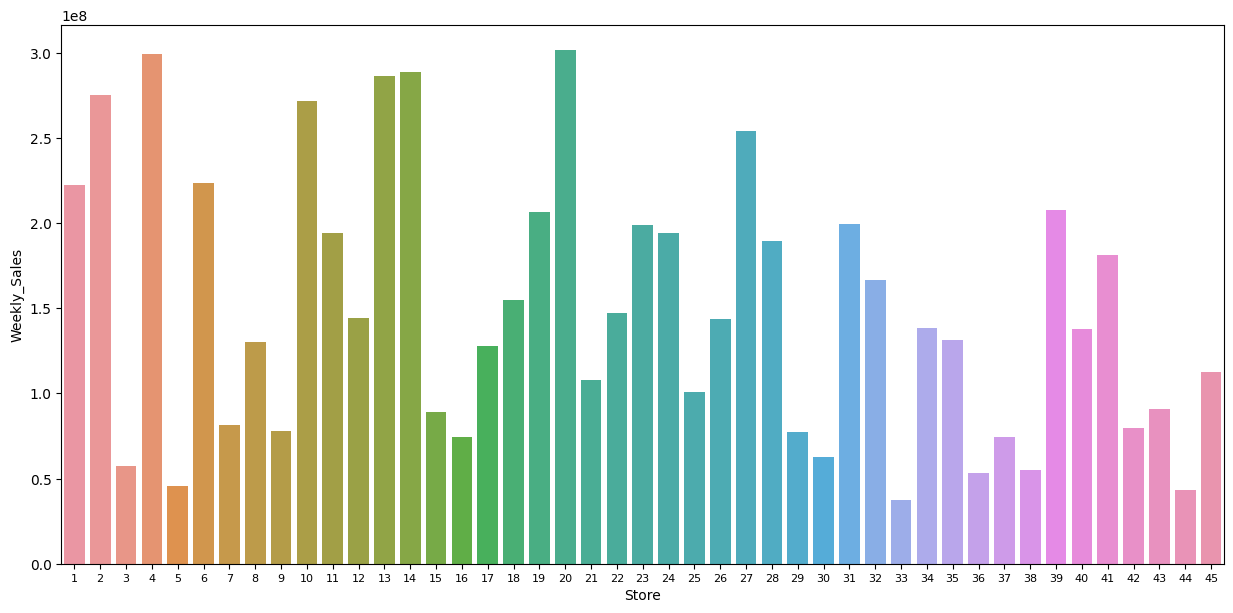

In [15]:
# Weekly_sales by Store

plt.figure(figsize=(15,7))
weekly_sales_by_store=walmart.groupby(['Store'])['Weekly_Sales'].sum().reset_index()
weekly_sales_by_store
sns.barplot(weekly_sales_by_store,y=weekly_sales_by_store['Weekly_Sales'],x=weekly_sales_by_store['Store'])
plt.xticks(fontsize=8)
plt.show()


Store Number 2,4,10,13,14,20,28 make more profit and Store Number like 3,5,15,16,29,30,33,36,38,44 made less Weekly Sales in comparison to other store

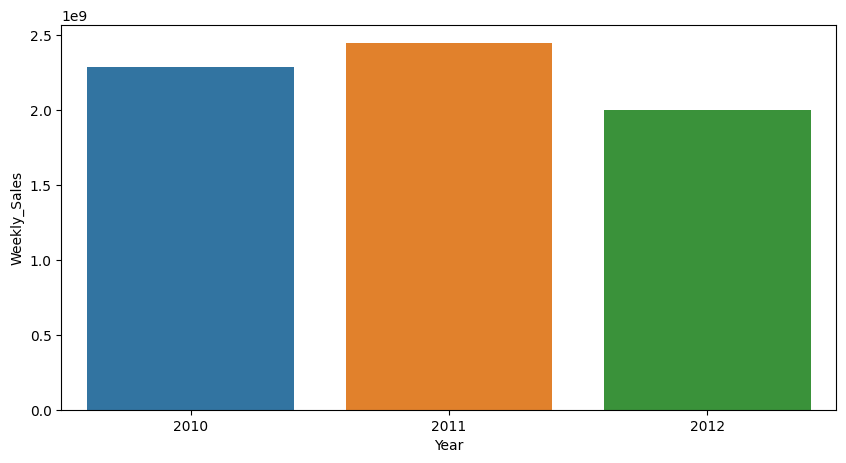

In [16]:
# Sales by Year
plt.figure(figsize=(10,5))
weekly_sales_by_year=walmart.groupby(['Year'])['Weekly_Sales'].sum().reset_index()
weekly_sales_by_year
sns.barplot(weekly_sales_by_year,y=weekly_sales_by_year['Weekly_Sales'],x=weekly_sales_by_year['Year'])
plt.show()

In year 2011 total sales goes High then in 2010 and 2012 respectively this is because we don't have data of january month in 2010 and in 2012 year we have data till october

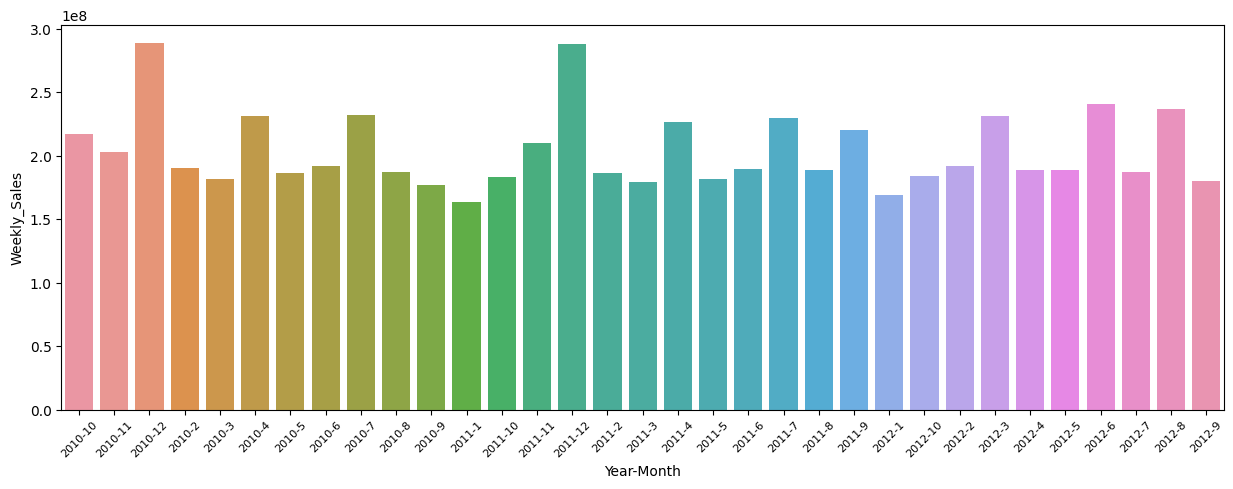

In [17]:
# Weekly_sales by Year-Month

plt.figure(figsize=(15,5))
weekly_sales_by_year_month=walmart.groupby(['Year-Month'])['Weekly_Sales'].sum().reset_index()
weekly_sales_by_year_month
sns.barplot(weekly_sales_by_year_month,y=weekly_sales_by_year_month['Weekly_Sales'],x=weekly_sales_by_year_month['Year-Month'])
plt.xticks(fontsize=8,rotation=45)
plt.show()

In Each Year Weekly_Sales Goes High In December,April,June,July and least in January

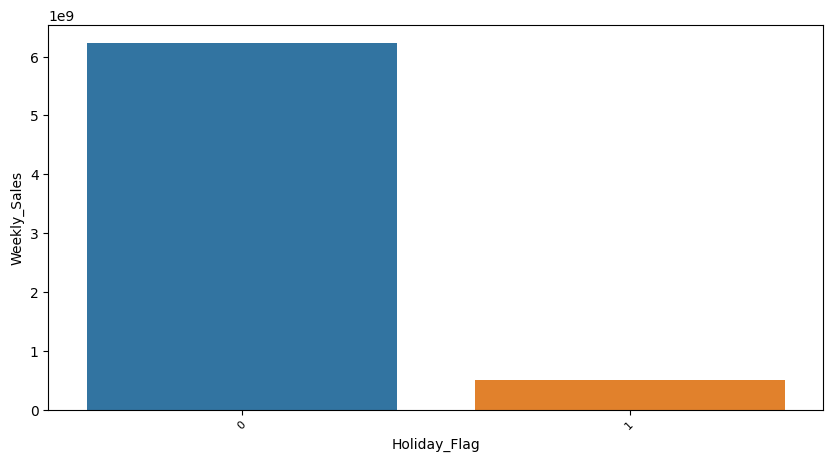

In [18]:
# Let's Check sales for holiday_flag
plt.figure(figsize=(10,5))
weekly_sales_by_holiday=walmart.groupby(['Holiday_Flag'])['Weekly_Sales'].sum().reset_index()
weekly_sales_by_holiday
sns.barplot(weekly_sales_by_holiday,y=weekly_sales_by_holiday['Weekly_Sales'],x=weekly_sales_by_holiday['Holiday_Flag'])
plt.xticks(fontsize=8,rotation=45)
plt.show()

As we have already know sales goes high on non holiday sales as conparison to holiday 

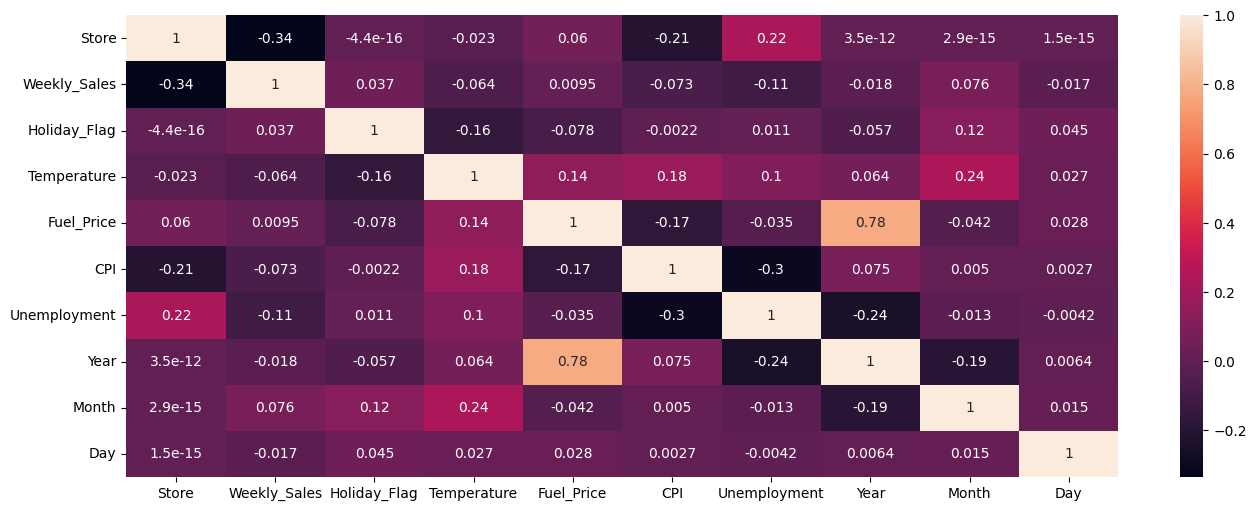

In [19]:
# Let's Check the correlation between Feature
plt.figure(figsize=(16,6))
corr=walmart.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
# Let's Check sales acc to Temperature
import plotly.express as px
plt.figure(figsize=(10,5))
fig=px.scatter(walmart,x=walmart['Temperature'],y=walmart['Weekly_Sales'])
fig.show()


<Figure size 1000x500 with 0 Axes>

Sales goes high between Temperature between 20°F to 60 °F and there is high dense sales between 60°F to 80°F 

In [21]:
# Let's Check sales acc to Fuel_price
import plotly.express as px
plt.figure(figsize=(10,5))
fig=px.scatter(walmart,x=walmart['Fuel_Price'],y=walmart['Weekly_Sales'])
fig.show()


<Figure size 1000x500 with 0 Axes>

As most of distribution is flatted between Weekly_sales of (0.25M)$ to (2.25M)$ but some instances goes high when fuel price is between 3 to 3.5 and also we capture the dense sales between 3.5 to 4 

In [22]:
bins=[3,6,9,12,15]
labels=['3-6','6-9','9-12','12-15']
walmart['Unemployment_rate_bins']=pd.cut(walmart['Unemployment'],bins=bins,labels=labels)

Text(0.5, 1.0, 'Average of Weekly Sales By Unemployment Rate')

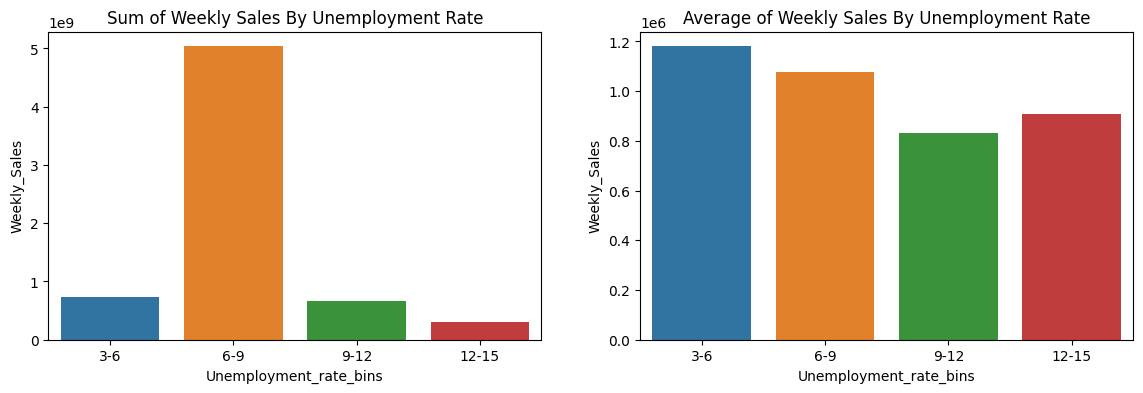

In [23]:
# Let's Check sales acc to unemployment rate
import plotly.express as px
plt.figure(figsize=(14,4))
weekly_sales_by_unemployment_rate=walmart.groupby(['Unemployment_rate_bins'])['Weekly_Sales'].sum().reset_index()
weekly_sales_by_unemployment_rate_mean=walmart.groupby(['Unemployment_rate_bins'])['Weekly_Sales'].mean().reset_index()
plt.subplot(121)
ax=sns.barplot(weekly_sales_by_unemployment_rate,x=weekly_sales_by_unemployment_rate['Unemployment_rate_bins'],y=weekly_sales_by_unemployment_rate['Weekly_Sales'])
ax.set_title('Sum of Weekly Sales By Unemployment Rate')

plt.subplot(122)
ax1=sns.barplot(weekly_sales_by_unemployment_rate_mean,x=weekly_sales_by_unemployment_rate_mean['Unemployment_rate_bins'],y=weekly_sales_by_unemployment_rate_mean['Weekly_Sales'])
ax1.set_title('Average of Weekly Sales By Unemployment Rate')

Weekly_Sales goes high when the unemployment rate is between 6-9 and least between 12-15 this is because less users purchase during the high unemployment rate and when unemployment rate is 3-6 most of user may be went to premium stores.  

In [24]:
import plotly.graph_objects as go
plt.figure(figsize=(20,8))
monthly_sales_cpi = walmart.groupby('Year-Month').agg({'Weekly_Sales': 'sum', 'CPI': 'mean'}).reset_index()
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthly_sales_cpi['Year-Month'],
    y=monthly_sales_cpi['Weekly_Sales'],
    name='Weekly Sales',
))
fig.add_trace(go.Scatter(
    x=monthly_sales_cpi['Year-Month'],
    y=monthly_sales_cpi['CPI'],
    name='CPI',
    yaxis='y2'
))

fig.update_layout(
    title='Weekly Sales and CPI over Time',
    xaxis=dict(
        title='Year-Month',
        tickangle=45 
    ),
    yaxis=dict(
        title='Weekly Sales',
    ),
    yaxis2=dict(
        title='CPI',
        overlaying='y',
        side='right'
    ),
    showlegend=True
)

fig.show()


<Figure size 2000x800 with 0 Axes>

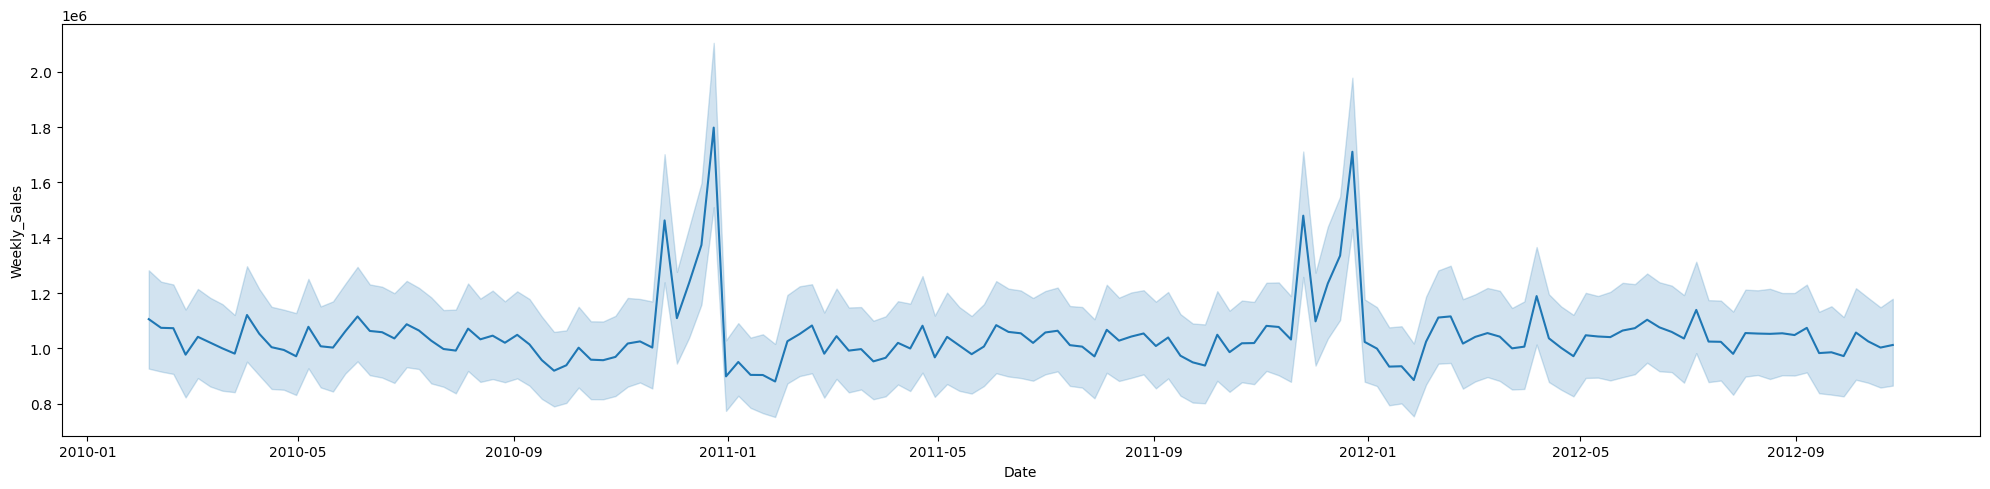

In [25]:
plt.figure(figsize=(20,5))
sns.lineplot(x=walmart['Date'],y=walmart['Weekly_Sales'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Sales go high in the end of the year more likely between october to december every year may be due to winter season

                                                   TIME SERIES ANALYYSIS

In [26]:
cdf=walmart.copy()

In [27]:
cdf.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Year-Month,Unemployment_rate_bins
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2010-2,6-9
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,2010-2,6-9
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-2,6-9
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-2,6-9
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2010-3,6-9


In [28]:
cdf_week=cdf.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

In [29]:
cdf_week.set_index('Date',inplace=True)


In [30]:
print(cdf_week.index.is_monotonic_increasing)
      

True


In [31]:
cdf_week.describe()

,Weekly_Sales
count,1.430000e+02
mean,1.046965e+06
std,1.209824e+05
min,8.799967e+05
25%,9.973464e+05
50%,1.027642e+06
75%,1.062045e+06
max,1.798476e+06


In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(cdf_week['Weekly_Sales'])

In [33]:
trend=decompose.trend
season=decompose.seasonal
residual=decompose.resid

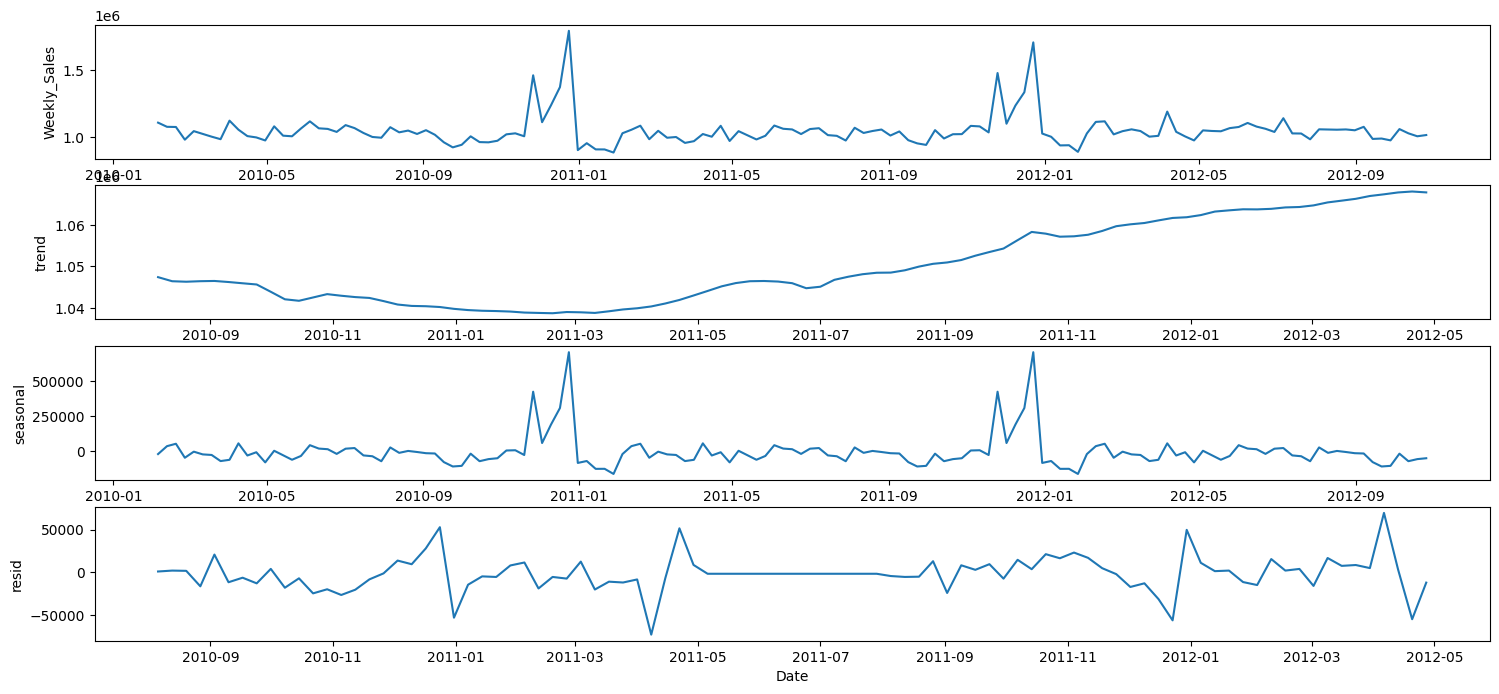

In [34]:
plt.figure(figsize=(18,8))

plt.subplot(411)
sns.lineplot(cdf_week['Weekly_Sales'])

plt.subplot(412)
sns.lineplot(trend)

plt.subplot(413)
sns.lineplot(season)


plt.subplot(414)
sns.lineplot(residual)

plt.show()

In [35]:
from statsmodels.tsa.seasonal import STL
decompose_stl=seasonal_decompose(cdf_week['Weekly_Sales'])

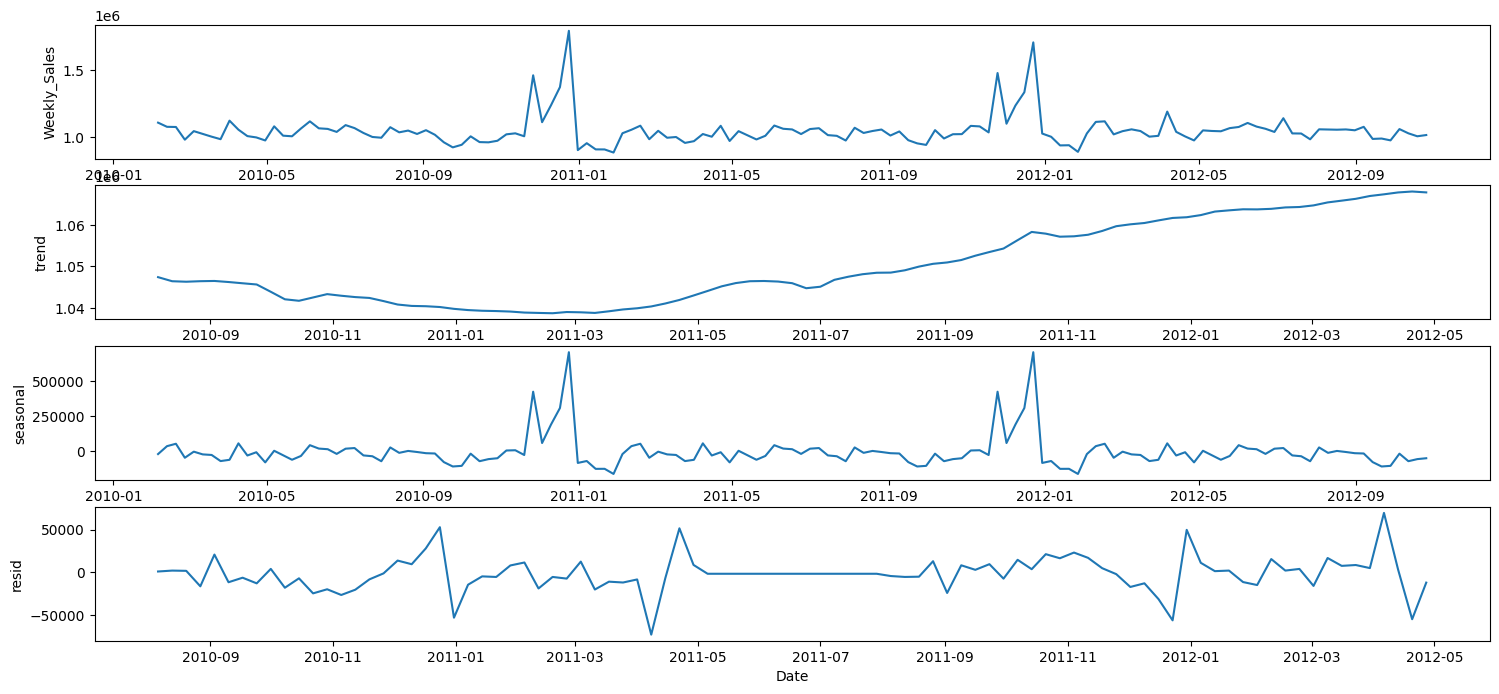

In [36]:
plt.figure(figsize=(18,8))

plt.subplot(411)
sns.lineplot(cdf_week['Weekly_Sales'])

plt.subplot(412)
sns.lineplot(decompose_stl.trend)

plt.subplot(413)
sns.lineplot(decompose_stl.seasonal)


plt.subplot(414)
sns.lineplot(decompose_stl.resid)

plt.show()

STAIONARITY TEST

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
adf_test=adfuller(cdf_week['Weekly_Sales'])
print("ADF TEST RESULTS")
adfoutput = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adf_test[4].items():
    adfoutput['Critical Value (%s)'%key] = value
print (adfoutput)

ADF TEST RESULTS
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [39]:

from statsmodels.tsa.stattools import kpss
kpss_test=kpss(cdf_week['Weekly_Sales'])
print("ADF TEST RESULTS")
kpssoutput = pd.Series(kpss_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in kpss_test[3].items():
    kpssoutput['Critical Value (%s)'%key] = value
print (kpssoutput)

ADF TEST RESULTS
Test Statistic                                                          0.048892
p-value                                                                      0.1
#Lags Used                                                                     5
Number of Observations Used    {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
Critical Value (10%)                                                       0.347
Critical Value (5%)                                                        0.463
Critical Value (2.5%)                                                      0.574
Critical Value (1%)                                                        0.739
dtype: object


<ipython-input-39-62a11cab9afc>:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




Weekly_Sales is already Stationary 

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

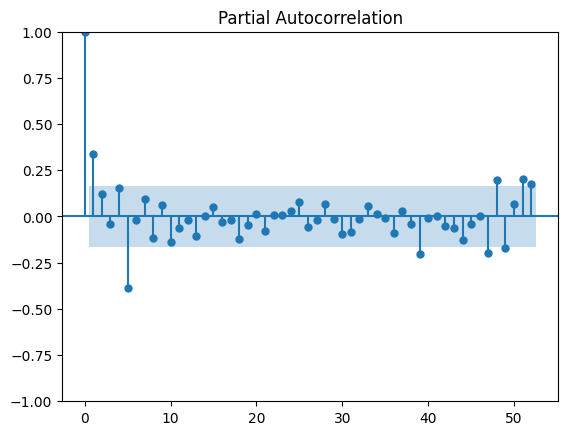

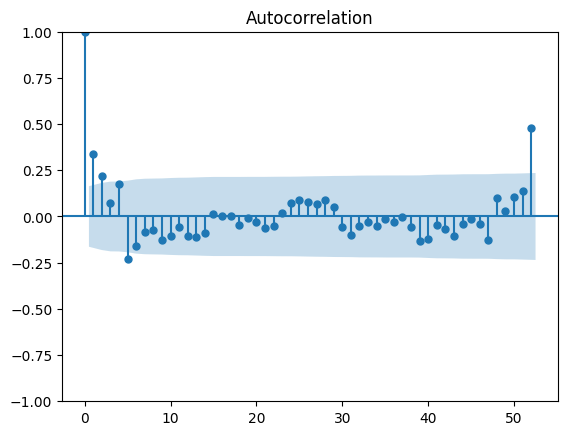

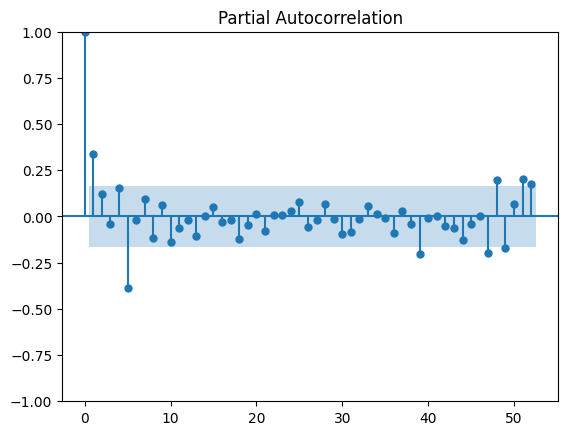

In [41]:

plot_acf(cdf_week['Weekly_Sales'],lags=52)

plot_pacf(cdf_week['Weekly_Sales'],lags=52)

Autocorrelation suggest that their is some seasonality as lag goes upward and downward so try to figure out the model with  AR value of 1
and partial correlation suggest us to take the value of MA model as 1 

In [42]:
x_train=cdf_week[:int(len(cdf_week)*0.70)]
x_test=cdf_week[int(len(cdf_week)*0.70):]

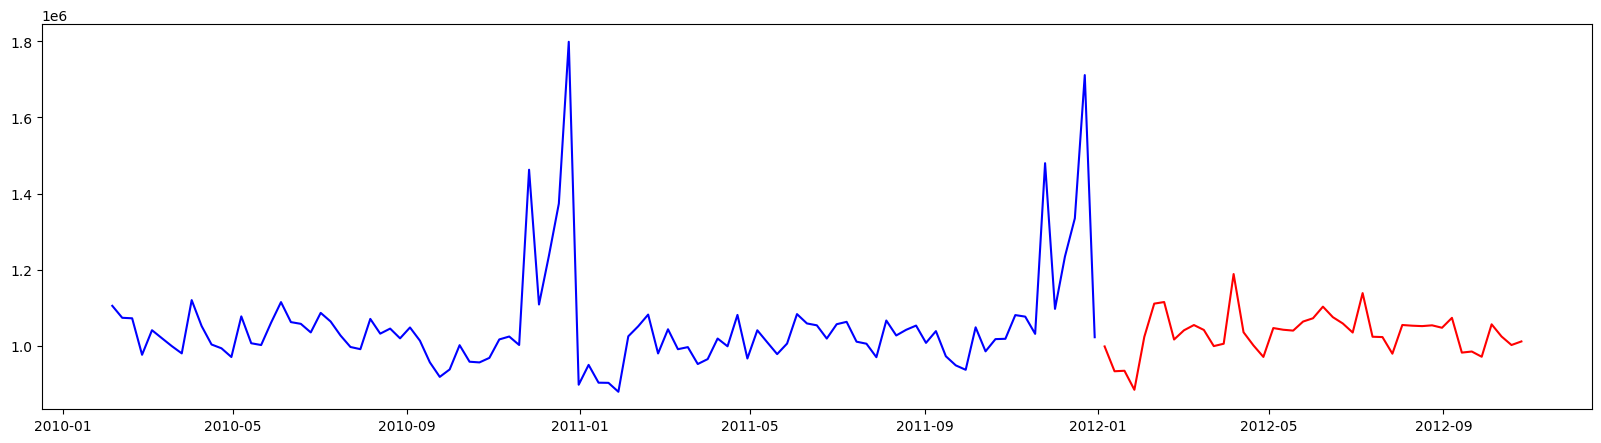

In [43]:
plt.figure(figsize=(20,5))
plt.plot(x_train,color='blue')
plt.plot(x_test,color='red')
plt.show()

In [44]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.5 MB/s eta 0:00:00


In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
from pmdarima import auto_arima


auto_model = auto_arima(x_train['Weekly_Sales'], seasonal=True, trace=True)
print("Optimal (p, d, q):", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2646.557, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2656.722, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2647.054, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2650.783, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3060.896, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2650.197, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2648.024, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2647.965, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2644.308, Time=0.24 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2650.819, Time=0.10 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2639.600, Time=0.37 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=2636.659, Time=0.47 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=2634.904, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2641.668, Time=0.18 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

In [47]:
model = ARIMA(x_train['Weekly_Sales'], order=auto_model.order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(x_test['Weekly_Sales']))

# Print the forecasted Weekly_Sales
print("Forecasted Weekly Sales for the next 10 Months:")
print(forecast)


Forecasted Weekly Sales for the next 10 Months:
2012-01-06    1.185024e+06
2012-01-13    1.126702e+06
2012-01-20    1.198721e+06
2012-01-27    8.093849e+05
2012-02-03    1.051501e+06
2012-02-10    9.881571e+05
2012-02-17    1.042289e+06
2012-02-24    8.892803e+05
2012-03-02    1.103030e+06
2012-03-09    1.024727e+06
2012-03-16    1.071594e+06
2012-03-23    1.004005e+06
2012-03-30    1.129202e+06
2012-04-06    1.040001e+06
2012-04-13    1.077060e+06
2012-04-20    1.035568e+06
2012-04-27    1.098613e+06
2012-05-04    1.027674e+06
2012-05-11    1.064389e+06
2012-05-18    1.037350e+06
2012-05-25    1.072242e+06
2012-06-01    1.028079e+06
2012-06-08    1.062003e+06
2012-06-15    1.042272e+06
2012-06-22    1.063575e+06
2012-06-29    1.037765e+06
2012-07-06    1.063199e+06
2012-07-13    1.046617e+06
2012-07-20    1.060215e+06
2012-07-27    1.044544e+06
2012-08-03    1.061205e+06
2012-08-10    1.047783e+06
2012-08-17    1.057370e+06
2012-08-24    1.047571e+06
2012-08-31    1.058120e+06
2012-09

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



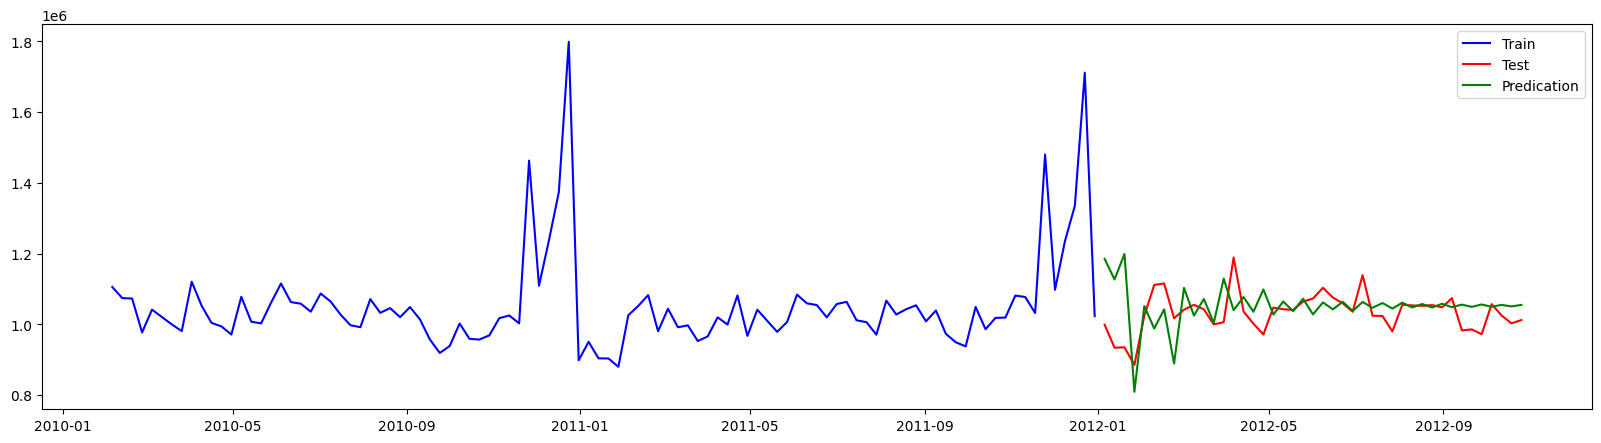

In [48]:
plt.figure(figsize=(20,5))
plt.plot(x_train,color='blue',label='Train')
plt.plot(x_test,color='red',label='Test')
plt.plot(forecast,color='green',label='Predication')
plt.legend(loc='best')
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error,r2_score
actual = x_test['Weekly_Sales']
mae = mean_absolute_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))
mape=mean_absolute_percentage_error(actual,forecast)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Absolute Percenatge Error:',mape)


Mean Absolute Error (MAE): 57100.53324842032
Root Mean Squared Error (RMSE): 81633.93511348951
Mean Absolute Percenatge Error: 0.05640335131862712



Insights

MAE = 57100.53:
The average error is around 5.45% of the mean weekly sales (calculated as 
MAE
/
Mean Sales
×
100
MAE/Mean Sales×100).
This shows that the model's forecasts deviate only slightly from actual sales, which is acceptable for business decisions.
RMSE = 81633.93:
The RMSE is slightly higher, which reflects the penalty for larger errors.
While this is expected, the RMSE is still less than 8% of the mean sales (
RMSE
/
Mean Sales
×
100
RMSE/Mean Sales×100), indicating that the model performs well overall.
MAPE = 5.64%:
A MAPE below 10% is excellent for forecasting. It means the model's predictions, on average, deviate by only 5.64% from the actual values.


                                                  RANDOM FOREST REGRESSOR

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [51]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Store                   6435 non-null   int64         
 1   Date                    6435 non-null   datetime64[ns]
 2   Weekly_Sales            6435 non-null   float64       
 3   Holiday_Flag            6435 non-null   int64         
 4   Temperature             6435 non-null   float64       
 5   Fuel_Price              6435 non-null   float64       
 6   CPI                     6435 non-null   float64       
 7   Unemployment            6435 non-null   float64       
 8   Year                    6435 non-null   int32         
 9   Month                   6435 non-null   int32         
 10  Day                     6435 non-null   int32         
 11  Year-Month              6435 non-null   object        
 12  Unemployment_rate_bins  6435 non-null   category

In [52]:
x_train,x_test,y_train,y_test=train_test_split(walmart.drop(columns=['Date','Weekly_Sales','Year-Month']),walmart['Weekly_Sales'],test_size=0.20,random_state=42)

In [53]:
x_train.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Unemployment_rate_bins
1033,8,0,75.32,2.582,214.878556,6.315,2010,9,17,6-9
915,7,0,20.70,3.372,192.058484,8.818,2011,3,11,6-9
5903,42,0,61.24,3.130,126.546161,9.003,2010,11,12,9-12
2083,15,0,69.19,3.906,136.213613,7.806,2011,8,26,6-9
5943,42,0,87.40,3.743,129.240581,8.257,2011,8,19,6-9


In [54]:
x_train.shape

(5148, 10)

In [55]:
x_test.shape

(1287, 10)

In [56]:
num_attribute=list(walmart.select_dtypes(include=['number']).drop(columns='Weekly_Sales'))
cat_attribute=list(walmart.select_dtypes(exclude=['number']).drop(columns=['Year-Month','Date']))

In [57]:
print('num_attribute:',num_attribute)
print('cat_attribute:',cat_attribute)

num_attribute: ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']
cat_attribute: ['Unemployment_rate_bins']


In [58]:
preprocessor=ColumnTransformer(transformers=[
    ('StandardScaler',StandardScaler(),num_attribute),
    ('One Hot Encoder',OneHotEncoder(drop='first',sparse_output=True),cat_attribute)
],remainder='passthrough')

In [59]:
x_test

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Unemployment_rate_bins
2436,18,0,42.39,2.805,131.784000,9.202,2010,3,12,9-12
3361,24,0,68.88,3.964,135.265267,8.212,2011,6,24,6-9
233,2,0,65.87,3.372,217.325182,7.441,2011,10,28,6-9
3667,26,0,40.08,3.570,136.461806,7.598,2011,11,11,6-9
5011,36,0,59.56,2.701,209.980321,8.554,2010,3,19,6-9
...,...,...,...,...,...,...,...,...,...,...
2600,19,0,74.20,2.942,132.614193,8.099,2010,8,6,6-9
6308,45,0,69.27,2.899,182.046418,8.899,2010,5,28,6-9
6292,45,0,27.31,2.784,181.871190,8.992,2010,2,5,6-9
151,2,0,63.27,2.719,210.479887,8.200,2010,4,2,6-9


In [60]:
x_train_transformed=preprocessor.fit_transform(x_train)
x_test_transformed=preprocessor.fit_transform(x_test)


In [61]:
print('x_train_transformed shape',x_train_transformed.shape)
print('x_test_transformed shape',x_train_transformed.shape)

x_train_transformed shape (5148, 12)
x_test_transformed shape (5148, 12)


In [62]:
rfr=RandomForestRegressor(max_features=8,n_estimators=100)

In [63]:
rfr.fit(x_train_transformed,y_train)

RandomForestRegressor(max_features=8)

In [64]:
y_pred_rfr=rfr.predict(x_test_transformed)

In [65]:
mae = mean_absolute_error(y_test, y_pred_rfr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
mape=mean_absolute_percentage_error(y_test, y_pred_rfr)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Absolute Percenatge Error:',mape)
print('R2 Score',r2_score(y_test, y_pred_rfr))

Mean Absolute Error (MAE): 282800.90298850037
Root Mean Squared Error (RMSE): 488469.6943479468
Mean Absolute Percenatge Error: 0.36212756486983516
R2 Score 0.2593535262564082


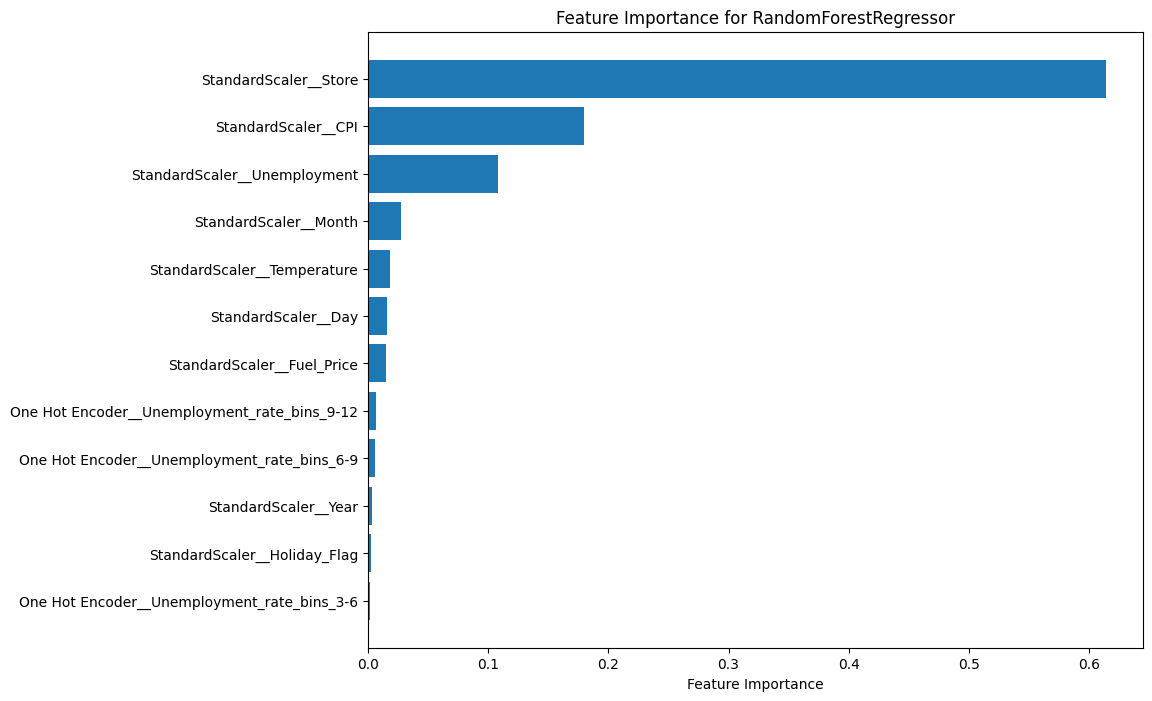

In [66]:
importance=rfr.feature_importances_
features=preprocessor.get_feature_names_out()
sorted_indices = importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_indices], importance[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()


In [67]:
from xgboost import XGBRegressor

In [68]:
xgb=XGBRegressor()

In [69]:
xgb.fit(x_train_transformed,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred_xgb=xgb.predict(x_test_transformed)

In [71]:
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape=mean_absolute_percentage_error(y_test, y_pred_xgb)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Absolute Percenatge Error:',mape)
print('R2 Score',r2_score(y_test, y_pred_xgb))

Mean Absolute Error (MAE): 74373.25668317793
Root Mean Squared Error (RMSE): 138920.69373682034
Mean Absolute Percenatge Error: 0.07595453170451309
R2 Score 0.9400940999539741


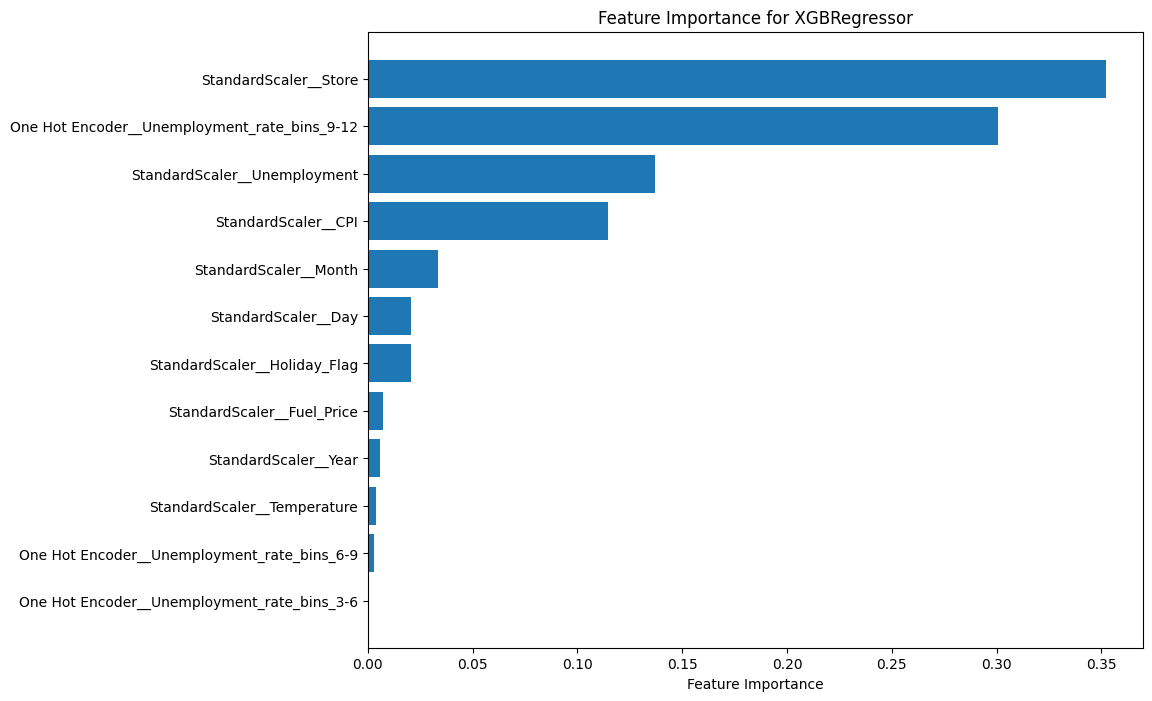

In [72]:
importance=xgb.feature_importances_
features=preprocessor.get_feature_names_out()
sorted_indices = importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_indices], importance[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XGBRegressor')
plt.show()


In [73]:
grid_search=GridSearchCV(estimator=xgb,param_grid=[{'booster':['gbtree','dart'],'max_depth':[6,8,4,10,None]}],cv=10,n_jobs=-1,scoring='neg_mean_squared_error')

In [74]:
grid_search.fit(x_train_transformed,y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid=[{'booster': ['gbtree', 'dart'],
                          'max_depth': [6, 8, 4, 10, None]}],
             scoring='neg_mean_squared_error')

In [75]:
grid_search.best_params_

{'booster': 'dart', 'max_depth': 6}

In [76]:
print("RMSE Score",np.sqrt(-grid_search.best_score_))

RMSE Score 85731.90253157563


In [77]:
xgb_best=grid_search.best_estimator_

In [78]:
xgb_best.fit(x_train_transformed,y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [79]:
y_pred_xgb_best=xgb_best.predict(x_test_transformed)


In [80]:
mae = mean_absolute_error(y_test, y_pred_xgb_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_best))
mape=mean_absolute_percentage_error(y_test, y_pred_xgb_best)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Absolute Percenatge Error:',mape)
print('R2 score',r2_score(y_test, y_pred_xgb_best))

Mean Absolute Error (MAE): 74373.24529526029
Root Mean Squared Error (RMSE): 138920.66607531137
Mean Absolute Percenatge Error: 0.07595451158650908
R2 score 0.94009412381057


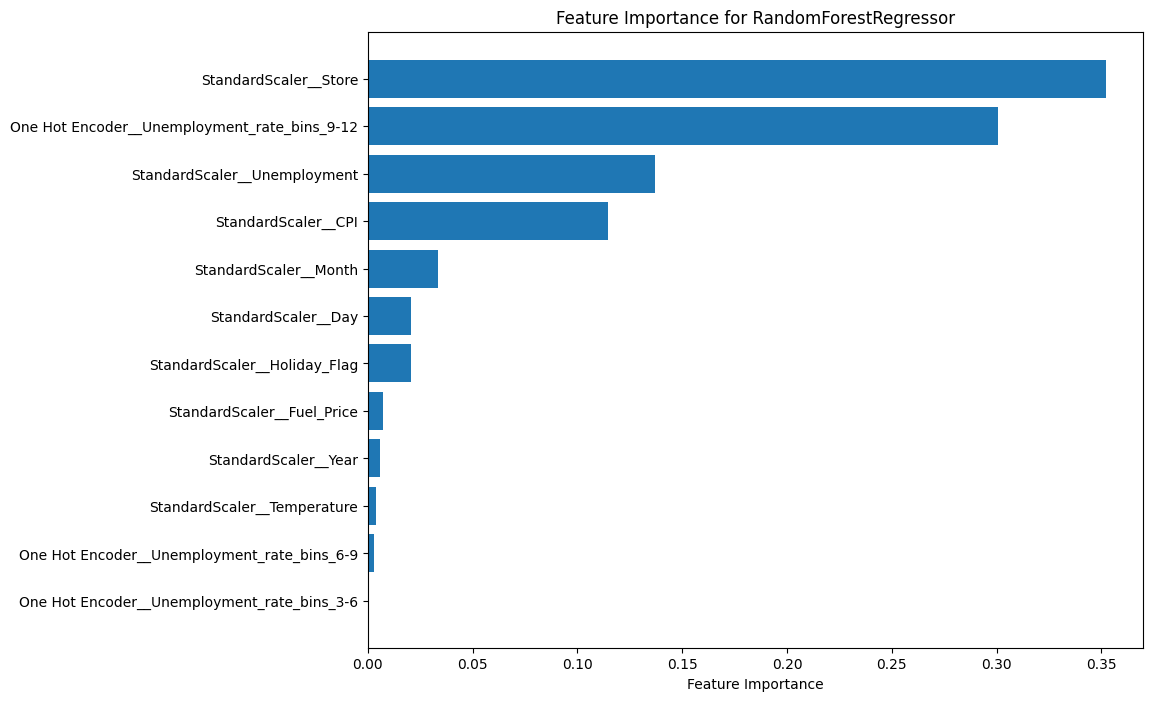

In [81]:
importance=xgb_best.feature_importances_
features=preprocessor.get_feature_names_out()
sorted_indices = importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_indices], importance[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()

XGBRegessor perform well then RandomForestRegressor with RMSE of 138920 and Mean_Absolute_Percentage_Error of 7% 

Final Decision :

we select ARIMA model as final model cause it perform better than any model.
ARIMA outperforms XGBoost Regressor in this specific case based on the provided accuracy metrics (lower MAE, RMSE, and MAPE). It is also computationally simpler and aligns better with time-series forecasting principles. However, if the goal includes maximizing explained variance and working with broader features, XGBoost would be preferable.

If the project objective is solely accurate forecasting, ARIMA is the better choice. However, for more feature-driven predictions or general-purpose regression, XGBoost might edge out.
